In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier


In [2]:
df = pd.read_csv("app_emulation/files/23_22_21-eea_europa_eu-CarsCO2_combustion.csv")

df.head()

C:\Users\T\AppData\Local\Temp\ipykernel_22496\2245148285.py:1: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("app_emulation/files/23_22_21-eea_europa_eu-CarsCO2_combustion.csv")


,ID,member_state,manufacturer_name_eu,vehicle_type,commercial_name,category_of_vehicle,fuel_type,fuel_mode,innovative_technologies,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,year,electric_range,electric_energy_consumption,fuel_consumption,specific_co2_emissions
0,56002959,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
1,56002960,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
2,56002961,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
3,56002962,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0
4,56002963,GR,HYUNDAI,OS,"KONA,KAUAI",M1,diesel,M,NaN,1415.0,1600.0,1598.0,100.0,NaN,2021,NaN,NaN,NaN,127.0


In [ ]:
numeric_columns_with_nans = ['mass_vehicle', 'engine_capacity', 
                             'engine_power', 'erwltp', 'fuel_consumption']

for column in numeric_columns_with_nans:
    df[column].fillna(df[column].mean(), inplace=True)

print(df[numeric_columns_with_nans].isna().sum())

#print(df.isna().sum())

C:\Users\T\AppData\Local\Temp\ipykernel_22496\2572153789.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


mass_vehicle              0
weltp_test_mass           0
engine_capacity           0
engine_power              0
erwltp                    0
fuel_consumption          0
specific_co2_emissions    0
dtype: int64


In [ ]:
#unimportant categorical variables
#electric columns
#ID
#after discussions: weltp_test_mass, specific_co2_emissions, erwltp
df.head()

df = df.drop(['member_state', 'manufacturer_name_eu', 'commercial_name', 'innovative_technologies', 'year', 'electric_range', 'electric_energy_consumption', 'ID', 'weltp_test_mass', 'specific_co2_emissions', 'erwltp'], axis=1)


,ID,vehicle_type,category_of_vehicle,fuel_type,fuel_mode,mass_vehicle,weltp_test_mass,engine_capacity,engine_power,erwltp,fuel_consumption,specific_co2_emissions
0,56002959,OS,M1,diesel,M,1415.0,1600.0,1598.0,100.0,1.491346,5.399821,127.0
1,56002960,OS,M1,diesel,M,1415.0,1600.0,1598.0,100.0,1.491346,5.399821,127.0
2,56002961,OS,M1,diesel,M,1415.0,1600.0,1598.0,100.0,1.491346,5.399821,127.0
3,56002962,OS,M1,diesel,M,1415.0,1600.0,1598.0,100.0,1.491346,5.399821,127.0
4,56002963,OS,M1,diesel,M,1415.0,1600.0,1598.0,100.0,1.491346,5.399821,127.0


C:\Users\T\AppData\Local\Temp\ipykernel_22496\2611653623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel Type', y='Counts', data=fuel_type_counts, palette='viridis')


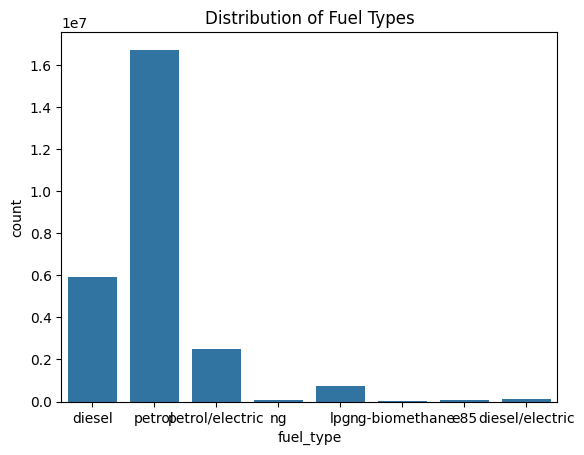

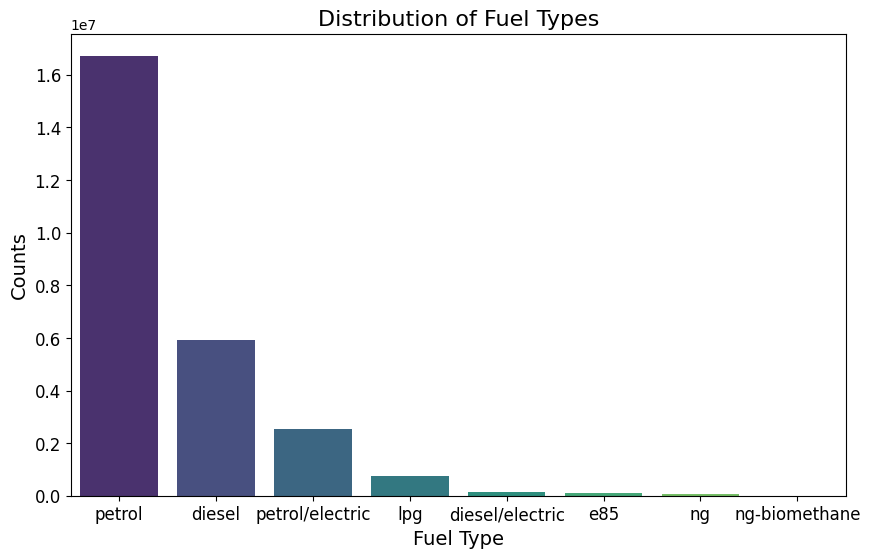

In [5]:
sns.countplot(data=df, x='fuel_type')
plt.title('Distribution of Fuel Types')

fuel_type_counts = df['fuel_type'].value_counts().reset_index()
fuel_type_counts.columns = ['Fuel Type', 'Counts']

plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel Type', y='Counts', data=fuel_type_counts, palette='viridis')
plt.title('Distribution of Fuel Types', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#pairplot obsolete

In [ ]:
#engine power obsolete?

 oldschool fuel types, diesel and petrol, have many different ranges for engine power, including some very high outliers, which may reflect high-performance models.

 alternative fuels such as electric, LPG, and hybrid (petrol/electric and diesel/electric) generally exhibit lower ranges of engine power, with fewer outliers. This could indicate more consistent performance specifications or possibly limitations in current technology.

 Engine power is likely a predictive feature for fuel type because different fuel types exhibit distinct distributions of engine power. This graph supports the inclusion of engine power as a feature in predictive models.

In [ ]:
#print(df.head())

target = df['fuel_type']
data = df.drop('fuel_type', axis=1)

numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data_numeric = data[numeric_columns]
data = data_numeric

#execute til here
feature_names = data.columns.tolist()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# target = encoder.fit_transform(target)

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, random_state=42)

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
#decision tree
# Initialize and train classifier
clf = DecisionTreeClassifier(random_state=42)
#clf.fit(X_train, y_train)
clf.fit(data_train_scaled, target_train)

# Predict and evaluate
# predictions = clf.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
predictions = clf.predict(data_test_scaled)
accuracy = accuracy_score(target_test, predictions)

print(f'Accuracy: {accuracy:.2f}')

In [ ]:

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

#or old code
# import os 

# graphviz_path = r'C:\Program Files\Graphviz\bin'  # Update to your Graphviz path
# os.environ["PATH"] += os.pathsep + graphviz_path

# plt.figure(figsize=(40, 40))  # You can adjust the size as needed
# xgb.plot_tree(model, num_trees=0, rankdir='LR')  # 'LR' is left to right, 'TB' for top to bottom is also common
# #xgb.plot_tree(model, num_trees=0, rankdir='LR', num_parallel_tree=0, max_depth=3)

# plt.show()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.85)

data_train_pca = pca.fit_transform(data_train_scaled)
data_test_pca = pca.fit_transform(data_test_scaled)

In [ ]:
#encode for xgb!

encoder = LabelEncoder()
target = encoder.fit_transform(target)

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.20, random_state=42)

scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,  
    colsample_bytree=0.7,
    enable_categorical=True,  
    eval_metric='mlogloss',
    use_label_encoder=False 
)
model.fit(data_train_scaled, target_train)

#model.fit(data_train_pca, target_train)
predictions = model.predict(data_test_scaled)
#predictions = model.predict(data_test_pca)
accuracy = accuracy_score(target_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


C:\Users\T\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:50:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.99


In [ ]:
#old predict

Accuracy: 0.92


<Figure size 4000x4000 with 0 Axes>

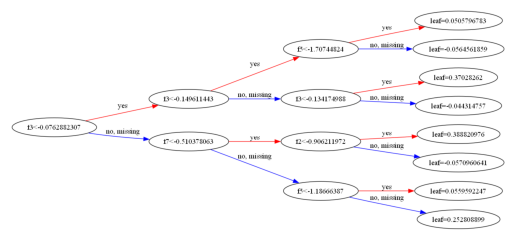

Decoded Predictions: ['diesel' 'petrol' 'petrol' ... 'petrol' 'petrol' 'petrol']
Decoded Predictions: ['diesel' 'petrol' 'petrol' ... 'petrol' 'petrol' 'petrol']


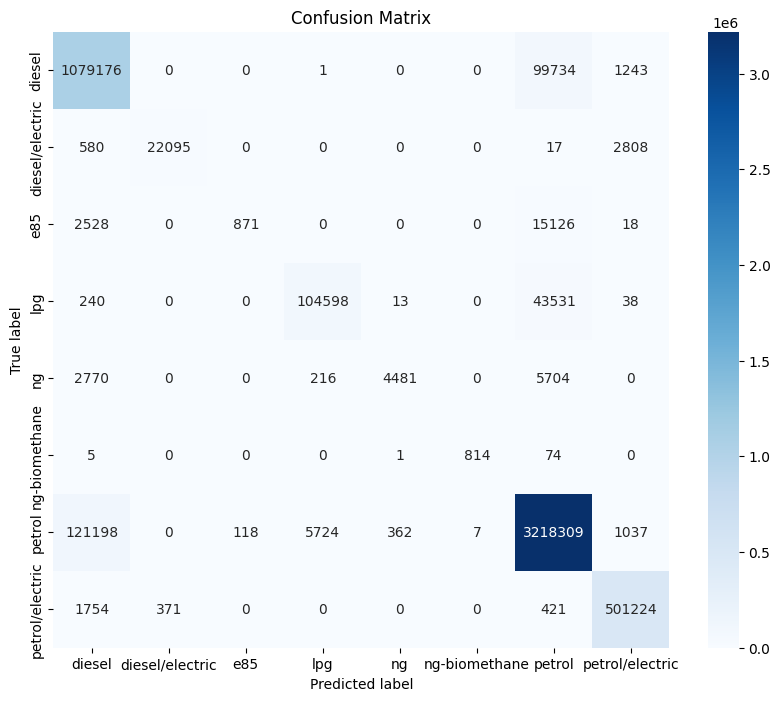

In [ ]:
from sklearn.metrics import confusion_matrix

predictions_labels = encoder.inverse_transform(predictions)
target_test_decoded = encoder.inverse_transform(target_test)

#print("Encoded:", predictions)
print("Decoded Predictions:", predictions_labels)

#print("Encoded:", target_test)
print("Decoded Predictions:", target_test_decoded)

class_names = encoder.classes_ 

#class_names = np.unique(np.concatenate((target_test_decoded, predictions_labels)))

mat = confusion_matrix(target_test_decoded, predictions_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)  # Set class names here
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# mat = confusion_matrix(target_test_decoded, predictions_labels)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('True label')
# plt.ylabel('Predicted label')
# plt.title('Confusion Matrix')
# plt.show()


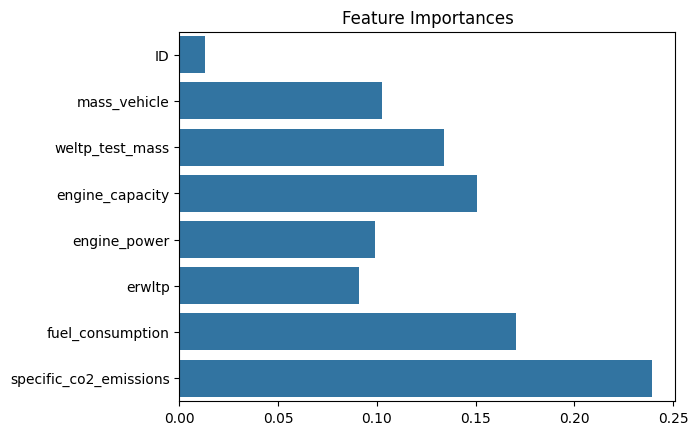

In [ ]:
#

In [ ]:
feature_importances = model.feature_importances_

#print(feature_importances)
#print(feature_names)

feature_importances = feature_importances
feature_names = feature_names

sns.barplot(x=feature_importances, y=feature_names)

plt.title('Feature Importances')
plt.show()

In [ ]:
# importances = rf.feature_importances_
# features = df.columns
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')

In [40]:
from imblearn.over_sampling import SMOTE
#smote and pca, and xgb anew!

#nochmal genau gucken was da für scaled, train etc. rein müssen!

#NACH scalen, VOR pca!

# Apply SMOTE
smote = SMOTE(random_state=42)
data_train_smoted, target_train_smoted = smote.fit_resample(data_train_scaled, target_train)

# Apply PCA
#pca = PCA(n_components=0.85)  # Adjust the number of components as needed
#data_train_smoted = pca.fit_transform(data_train_smoted)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#todo, split smote data, phil code!

# Shuffle the training set
#X_train, y_train = shuffle(X_train, y_train, random_state=42)
data_train_smoted_shuffle, target_train_smoted_shuffle = shuffle(data_train_smoted, target_train_smoted, random_state=42)


# Define batch size as 10% of the training dataset
batch_size = int(0.1 * X_train.shape[0])

# Select the first batch for training
# X_batch = X_train[:batch_size]
# y_batch = y_train[:batch_size]
data_batch = data_train_smoted_shuffle[:batch_size]
target_batch = target_train_smoted_shuffle[:batch_size]


model = xgb.XGBClassifier(
    objective='multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,  
    colsample_bytree=0.7,  
    enable_categorical=True,  
    eval_metric='mlogloss',
    use_label_encoder=False 
)
model.fit(data_batch, target_batch)

#model.fit(data_train_pca, target_train)
predictions = model.predict(data_test_scaled)
#predictions = model.predict(data_test_pca)
accuracy = accuracy_score(target_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
#another confusion matrix

from sklearn.metrics import confusion_matrix

predictions_labels = encoder.inverse_transform(predictions)
target_test_decoded = encoder.inverse_transform(target_test)

#print("Encoded:", predictions)
print("Decoded Predictions:", predictions_labels)

#print("Encoded:", target_test)
print("Decoded Predictions:", target_test_decoded)

class_names = encoder.classes_ 

#class_names = np.unique(np.concatenate((target_test_decoded, predictions_labels)))

mat = confusion_matrix(target_test_decoded, predictions_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Blues", 
            xticklabels=class_names, yticklabels=class_names)  # Set class names here
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# mat = confusion_matrix(target_test_decoded, predictions_labels)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('True label')
# plt.ylabel('Predicted label')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(data_train_scaled.shape[1],)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),                                   # Hidden layer
    tf.keras.layers.Dense(target_train.shape[1], activation='softmax')                   # Output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
    metrics=['accuracy']  # Metrics is set to accuracy for classification
)

In [ ]:
#target is encoded for xgb here already! but we can decode later if necessary.

history = model.fit(
    data_train_scaled, 
    target_train, 
    epochs=50,               # Adjust epochs according to your need
    validation_split=0.2,    # Use part of the training set for validation
    batch_size=32            # Number of samples per gradient update
)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(data_test_scaled, target_test)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.3f}")

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()